## Reconnaissance d'image (Cas CIFAR 10)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

<img src="cifar10_dataset.jpeg"/>

In [1]:
#importation des bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Importation du dataSet
from tensorflow.keras.datasetsasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [4]:
#Dimension des data
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

### Remarque
> L'ensemble d'entrainement est constitué de 50000 images et celui de test de 10000 image

> Les images sont de tailles 32 x 32

> Et la valeur 3 signifie qu'il a 3 canaux de couleurs soit des images en couleur Rouge - Vert - Bleu 

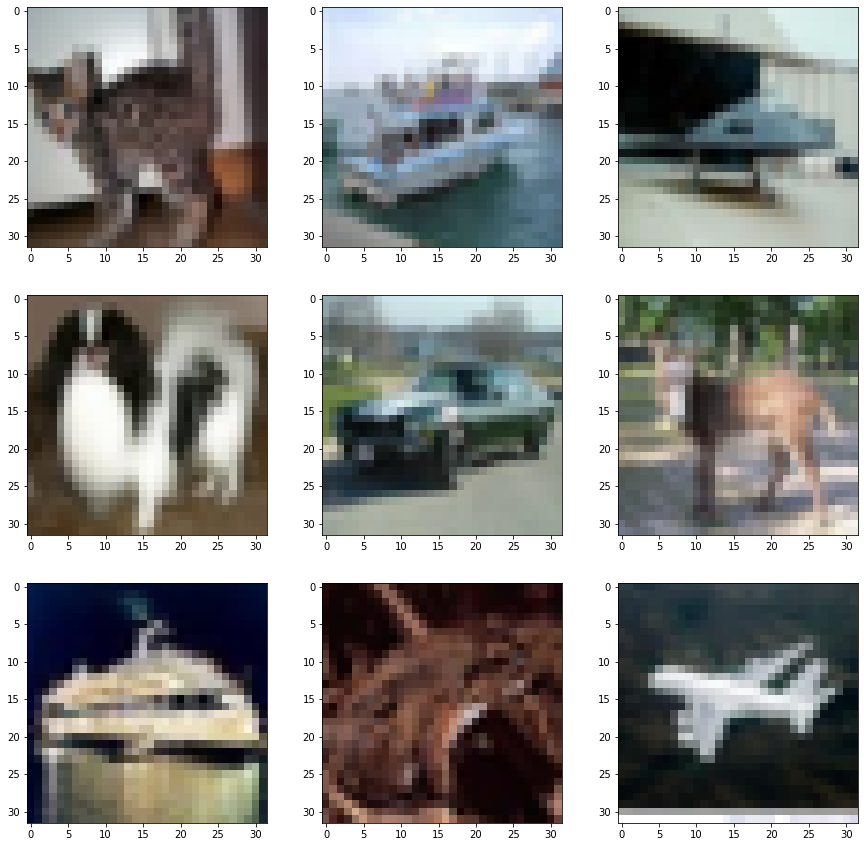

In [12]:
import random
#Visualisation des données train
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[random.randint(0,50000)])
    


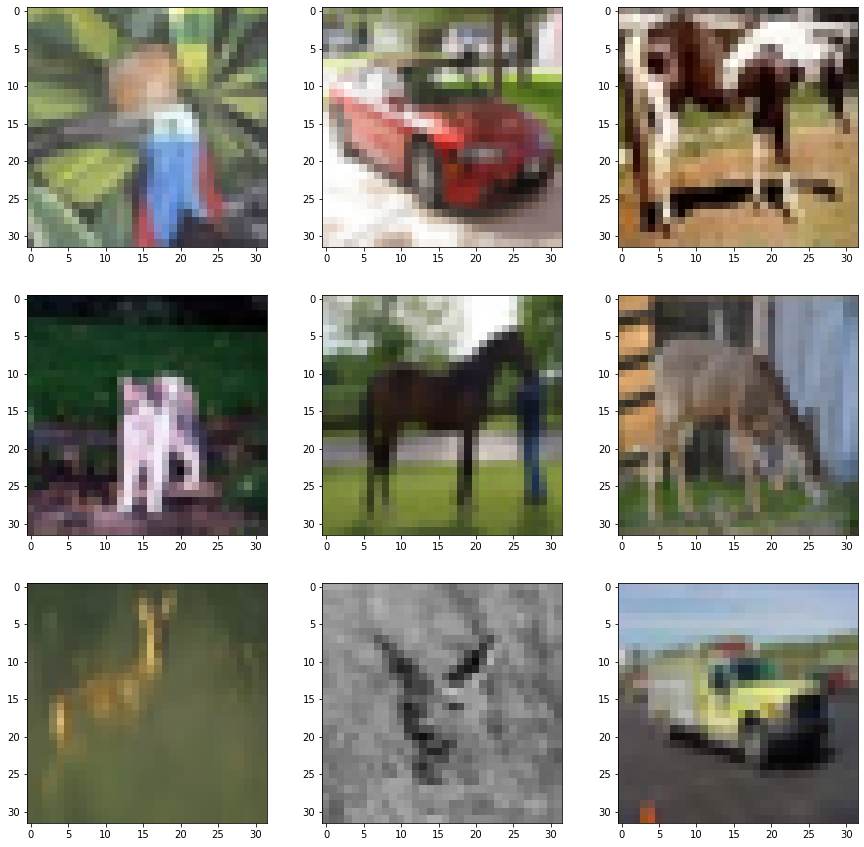

In [14]:
import random
#Visualisation des données test
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[random.randint(0,10000)])
    


## Remarque

> C'est un probleme de classification d'images.Les target Y sont donc des données catégorielles

In [15]:
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [17]:
#Normalisation des images (Executer une seule fois)
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train=X_train.reshape(50000,32,32,3)
X_test=X_test.reshape(10000,32,32,3)

## Création du modele

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [21]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="binary_crossentropy",optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
#Eviter les problemes Overfitting
early=EarlyStopping(monitor="val_loss",patience=2)

In [28]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=1000,callbacks=[early])

Epoch 1/1000
1563/1563 [==============================] - 316s 182ms/step - loss: 0.2669 - val_loss: 0.2059
Epoch 2/1000
1563/1563 [==============================] - 272s 174ms/step - loss: 0.2132 - val_loss: 0.1813
Epoch 3/1000
1563/1563 [==============================] - 272s 174ms/step - loss: 0.1908 - val_loss: 0.1834
Epoch 4/1000
1563/1563 [==============================] - 394s 252ms/step - loss: 0.1747 - val_loss: 0.1738
Epoch 5/1000
1563/1563 [==============================] - 537s 343ms/step - loss: 0.1618 - val_loss: 0.1705
Epoch 6/1000
1563/1563 [==============================] - 536s 343ms/step - loss: 0.1499 - val_loss: 0.1615
Epoch 7/1000
1563/1563 [==============================] - 498s 319ms/step - loss: 0.1391 - val_loss: 0.1606
Epoch 8/1000
1563/1563 [==============================] - 331s 212ms/step - loss: 0.1312 - val_loss: 0.1632
Epoch 9/1000
1563/1563 [==============================] - 326s 208ms/step - loss: 0.1216 - val_loss: 0.1582
Epoch 10/1000
1563/1563 [===

## Evaluation du modele

<AxesSubplot:>

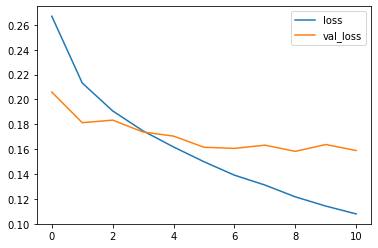

In [31]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [32]:
predictions=np.argmax(model.predict(X_test),axis=1)
predictions

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.82      0.81      0.82      1000
           2       0.51      0.49      0.50      1000
           3       0.39      0.61      0.48      1000
           4       0.58      0.61      0.59      1000
           5       0.75      0.40      0.52      1000
           6       0.72      0.76      0.74      1000
           7       0.77      0.69      0.73      1000
           8       0.82      0.75      0.78      1000
           9       0.72      0.84      0.78      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



# Remarque

> Les performances de notre modele ne sont pas optimales mais elles sont au dela de la moyenne

> Nous devons optimiser les performances en rajoutant d'autres couches de neurones

> En variant les hyper parametres au niveau de chaque layers

> En modifiant les fonctions d'activations au niveau des couches

<AxesSubplot:>

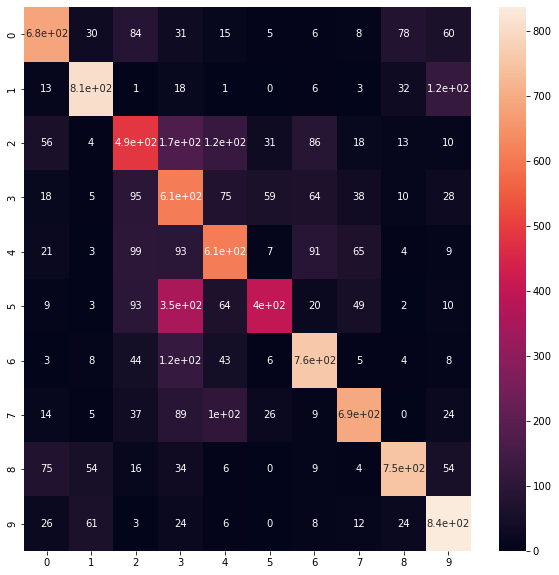

In [38]:
#Visuatlisation de la matrice de confusion
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Faire un essai


In [41]:
def cifar10_number_to_string(n):
    s=""
    if n==0:
        s="airplane"
    elif n==1:
        s="automobile"
    elif n==2:
        s="bird"
    elif n==3:
        s="cat"
    elif n==4:
        s="deer"
    elif n==5:
        s="dog"
    elif n==6:
        s="frog"
    elif n==7:
        s="house"
    elif n==8:
        s="ship"
    elif n==9:
        s="truck"
    return s
        
def predire(model,cas):
    plt.imshow(cas.reshape(32,32,3))
    resultat=np.argmax(model.predict(cas.reshape(1,32,32,3)),axis=1)[0]
    return f"Le nombre sur l'image est {cifar10_number_to_string(resultat)}"

"Le nombre sur l'image est ship"

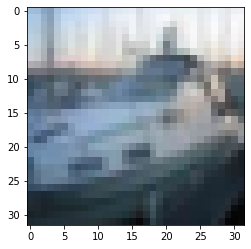

In [42]:
predire(model,X_test[2])

## Sauvegarder le modele


In [ ]:
#Executer cette ligne pour enregistrer le modele
model.save("cifar10_cnn.h5")

## Fin